In [2]:
import sys; sys.path.append('/rds/general/user/cb2714/home/'); from wwa import *

cproj = cartopy.crs.PlateCarree()

xn, xx, yn, yx = [-10,40,35,50]

---
## **Pre-process data**

In [ ]:
# # Compile FWI data into a single file
# fl = sorted(glob.glob("../00_WWA_project_folder/live/data/era5_fire/*consolidated*.nc"))

# fwi_cns = [wrap_lon(xr.open_dataset(fnm)).fwinx.sel(longitude = slice(xn, xx), latitude = slice(yn, yx)).reset_coords(drop = True) for fnm in fl]

# fwi_int = wrap_lon(xr.open_dataset("../00_WWA_project_folder/live/data/era5_fire/era5_025_all-fire-indices_2023_intermediate.nc"))
# fwi_int = fwi_int.fwinx.sel(longitude = slice(xn, xx), latitude = slice(yn, yx), time = slice("2023-08", None)).reset_coords(drop = True)

# fwi = xr.concat(fwi_cns + [fwi_int], "time")
# fwi.to_netcdf("data/era5_fwi_"+"_".join([str(d) for d in [xn,xx,yn,yx]])+".nc")

---
## **ERA5 FWI & EFFIS burned area data**

In [1]:
fwi = xr.open_dataset("data/era5_fwi_-10_40_35_50.nc").fwinx
dsr = (fwi ** 1.77) * 0.0272

cdsr = xr.concat([dsr.sel(time = str(y)).cumsum("time") for y in np.unique(dsr.time.dt.year)], "time")
cdsr = cdsr.where(cdsr > 0)

dsr_m = dsr.resample(time = "MS").sum()
dsr_m = dsr_m.where(dsr_m > 0)

NameError: name 'xr' is not defined

In [37]:
dsr9_clim = dsr_m.groupby("time.month")[9].sel(time = slice("1990", "2020")).mean("time")

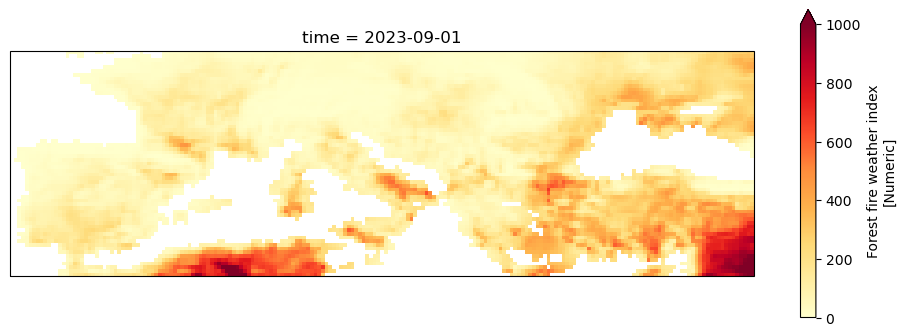

In [43]:
dsr_m.sel(time = "2023-09").plot(cmap = "YlOrRd", subplot_kws = {"projection" : cproj}, figsize = (12,4), vmin = 0, vmax = 1000)

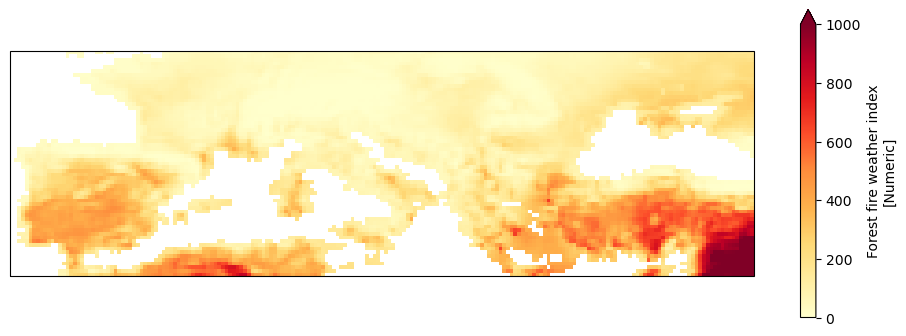

In [42]:
dsr9_clim.plot(cmap = "YlOrRd", subplot_kws = {"projection" : cproj}, figsize = (12,4), vmin = 0, vmax = 1000)

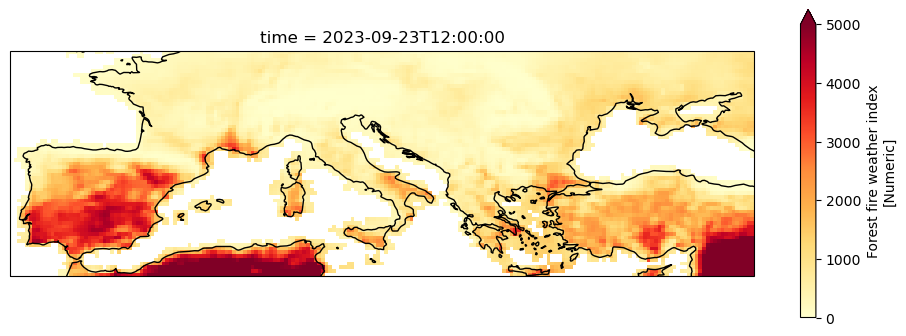

In [29]:
cdsr.isel(time = -1).plot(cmap = "YlOrRd", subplot_kws = {"projection" : cproj}, figsize = (12,4), vmin = 0, vmax = 5000)
ax = plt.gca()
ax.coastlines()

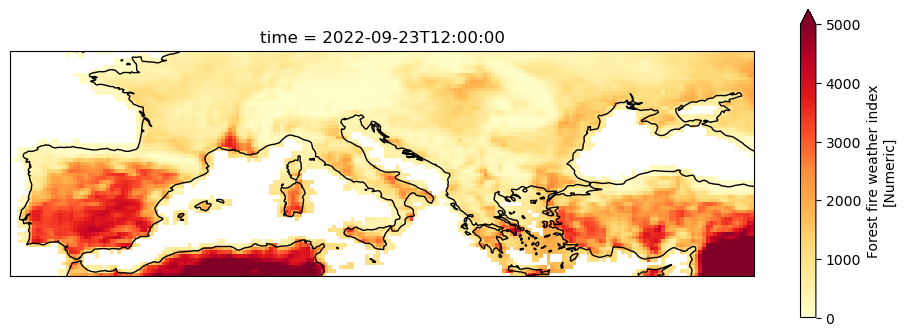

In [30]:
cdsr.isel(time = -366).plot(cmap = "YlOrRd", subplot_kws = {"projection" : cproj}, figsize = (12,4), vmin = 0, vmax = 5000)
ax = plt.gca()
ax.coastlines()